<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Singapore Housing Data and Kaggle Challenge

## 02 Feature Engineering & Preprocessing

> SG-DSI-41 Group 01: Daryl Chia, Germaine Choo, Lionel Foo

---

## 01. Import Libraries

In [1]:
# Import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import sklearn packages and functions:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics

## 02. Load & Check Data

In [2]:
# Load data:
train = pd.read_csv('./output/hdb_train_new.csv')

# Display all columns:
pd.set_option('display.max_columns', None)

# Check data:
print(train.shape)
train.head()

(149805, 49)


,Unnamed: 0,tranc_year,tranc_month,tranc_yearmonth,hdb_age,planning_area,commercial,market_hawker,multistorey_carpark,precinct_pavilion,max_floor_lvl,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,flat_type,flat_model,full_flat_type,mid_storey,floor_area_sqft,bus_interchange,bus_stop_nearest_distance,mrt_interchange,mrt_nearest_distance,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_food_stalls,hawker_market_stalls,hawker_nearest_distance,hawker_within_500m,hawker_within_2km,vacancy,pri_sch_affiliation,pri_sch_nearest_distance,cutoff_point,affiliation,sec_sch_nearest_dist,resale_price
0,0,2016,5,2016-05,10,Kallang,0,0,0,0,25,142,0,0,0,96,46,0,0,0,0,0,0,0,4 ROOM,Model A,4 ROOM Model A,11,968.760,0,29.427395,0,330.083069,1094.090418,0.0,0.0,7.0,84,60,154.753357,1.0,13.0,78,1,1138.633422,224,0,1138.633422,680000.0
1,1,2012,7,2012-07,25,Bishan,0,0,0,0,9,112,0,0,0,56,56,0,0,0,0,0,0,0,5 ROOM,Improved,5 ROOM Improved,8,1399.320,1,58.207761,1,903.659703,866.941448,0.0,1.0,3.0,80,77,640.151925,0.0,7.0,45,1,415.607357,232,0,447.894399,665000.0
2,2,2013,7,2013-07,16,Bukit Batok,0,0,0,0,16,90,0,0,0,0,30,60,0,0,0,0,0,0,EXECUTIVE,Apartment,EXECUTIVE Apartment,14,1550.016,1,214.747860,0,1334.251197,1459.579948,0.0,0.0,4.0,84,95,1762.082341,0.0,1.0,39,0,498.849039,188,0,180.074558,838000.0
3,3,2012,4,2012-04,20,Bishan,1,0,0,0,11,75,0,0,0,68,7,0,0,0,0,0,0,0,4 ROOM,Model A,4 ROOM Model A,3,1108.692,1,43.396521,1,907.453484,950.175199,0.0,1.0,4.0,32,86,726.215262,0.0,9.0,20,1,389.515528,253,1,389.515528,550000.0
4,4,2017,12,2017-12,30,Yishun,0,0,0,0,4,48,0,0,0,30,18,0,0,0,0,0,0,0,4 ROOM,Simplified,4 ROOM Simplified,2,893.412,0,129.422752,0,412.343032,729.771895,0.0,1.0,2.0,45,0,1540.151439,0.0,1.0,74,0,401.200584,208,0,312.025435,298000.0


In [3]:
# Drop irrelevant columns
train.drop(columns = ['Unnamed: 0'], inplace = True)

In [4]:
# check data
print(train.shape)
print(train.head())
print(train.dtypes)

(149805, 48)
   tranc_year  tranc_month tranc_yearmonth  hdb_age planning_area  commercial  \
0        2016            5         2016-05       10       Kallang           0   
1        2012            7         2012-07       25        Bishan           0   
2        2013            7         2013-07       16   Bukit Batok           0   
3        2012            4         2012-04       20        Bishan           1   
4        2017           12         2017-12       30        Yishun           0   

   market_hawker  multistorey_carpark  precinct_pavilion  max_floor_lvl  \
0              0                    0                  0             25   
1              0                    0                  0              9   
2              0                    0                  0             16   
3              0                    0                  0             11   
4              0                    0                  0              4   

   total_dwelling_units  1room_sold  2room_sold  

### 03. Separate Numerical and Categorical Features

In [5]:
# Identify binary categorical columns
binary_categorical_columns = [col for col in train.columns if train[col].nunique() == 2 and train[col].dtype == 'int64']

# Identify numerical and non-binary categorical columns
numerical_columns = [col for col in train.columns if col not in binary_categorical_columns and (train[col].dtype == 'int64' or train[col].dtype == 'float64')]
categorical_columns = [col for col in train.columns if col not in numerical_columns and col not in binary_categorical_columns]

In [6]:
# Check binary columns 
binary_categorical_columns

['commercial',
 'market_hawker',
 'multistorey_carpark',
 'precinct_pavilion',
 '1room_sold',
 'bus_interchange',
 'mrt_interchange',
 'pri_sch_affiliation',
 'affiliation']

In [7]:
# check numerical columns
numerical_columns

['tranc_year',
 'tranc_month',
 'hdb_age',
 'max_floor_lvl',
 'total_dwelling_units',
 '2room_sold',
 '3room_sold',
 '4room_sold',
 '5room_sold',
 'exec_sold',
 'multigen_sold',
 'studio_apartment_sold',
 '1room_rental',
 '2room_rental',
 '3room_rental',
 'other_room_rental',
 'mid_storey',
 'floor_area_sqft',
 'bus_stop_nearest_distance',
 'mrt_nearest_distance',
 'mall_nearest_distance',
 'mall_within_500m',
 'mall_within_1km',
 'mall_within_2km',
 'hawker_food_stalls',
 'hawker_market_stalls',
 'hawker_nearest_distance',
 'hawker_within_500m',
 'hawker_within_2km',
 'vacancy',
 'pri_sch_nearest_distance',
 'cutoff_point',
 'sec_sch_nearest_dist',
 'resale_price']

In [8]:
# check catogorical columns
categorical_columns

['tranc_yearmonth',
 'planning_area',
 'flat_type',
 'flat_model',
 'full_flat_type']

In [9]:
# 1room_sold should be a numerical feature - shift 1room_sold from categorical features to numerical features
binary_categorical_columns.remove('1room_sold')
numerical_columns.append('1room_sold')

In [10]:
# Check binary columns 
binary_categorical_columns

['commercial',
 'market_hawker',
 'multistorey_carpark',
 'precinct_pavilion',
 'bus_interchange',
 'mrt_interchange',
 'pri_sch_affiliation',
 'affiliation']

In [11]:
# check numerical columns
numerical_columns

['tranc_year',
 'tranc_month',
 'hdb_age',
 'max_floor_lvl',
 'total_dwelling_units',
 '2room_sold',
 '3room_sold',
 '4room_sold',
 '5room_sold',
 'exec_sold',
 'multigen_sold',
 'studio_apartment_sold',
 '1room_rental',
 '2room_rental',
 '3room_rental',
 'other_room_rental',
 'mid_storey',
 'floor_area_sqft',
 'bus_stop_nearest_distance',
 'mrt_nearest_distance',
 'mall_nearest_distance',
 'mall_within_500m',
 'mall_within_1km',
 'mall_within_2km',
 'hawker_food_stalls',
 'hawker_market_stalls',
 'hawker_nearest_distance',
 'hawker_within_500m',
 'hawker_within_2km',
 'vacancy',
 'pri_sch_nearest_distance',
 'cutoff_point',
 'sec_sch_nearest_dist',
 'resale_price',
 '1room_sold']

### 03. Analysis
- In continuation of our analysis from Part 1, it is evident that the feature 'trans_year' does not exhibit a linear relationship with the target variable 'resale_price'
- We will explore the relationship using polynomial regression, to draw insights into whether 'trans_year' should be treated as a categorical or continuous feature


In [12]:
# Check total count of columns
len(binary_categorical_columns + numerical_columns + categorical_columns)

48

In [13]:
# Remove target variable 'resale_price' from numerical predictors
numerical_columns.remove('resale_price')

In [14]:
# Extracting numerical columns from the 'train' dataset
numerical_data = train[numerical_columns]
# Extracting binary categorical columns from the 'train' dataset
binary_categorical_data = train[binary_categorical_columns]
# Extracting other categorical columns (non-binary) from the 'train' dataset
other_categorical_data = train[categorical_columns]

### 0.4. Polyfeatures for Numerical Predictors

In [15]:
# Creating polynomial features up to the second degree with interactions for numerical data
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transforming the numerical data with polynomial features
numerical_data_poly = poly.fit_transform(numerical_data)

In [16]:
## Creating a DataFrame for the polynomial features
numerical_poly = pd.DataFrame(numerical_data_poly, columns=poly.get_feature_names_out(numerical_columns))
numerical_poly.head()

,tranc_year,tranc_month,hdb_age,max_floor_lvl,total_dwelling_units,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,mid_storey,floor_area_sqft,bus_stop_nearest_distance,mrt_nearest_distance,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_food_stalls,hawker_market_stalls,hawker_nearest_distance,hawker_within_500m,hawker_within_2km,vacancy,pri_sch_nearest_distance,cutoff_point,sec_sch_nearest_dist,1room_sold,tranc_year^2,tranc_year tranc_month,tranc_year hdb_age,tranc_year max_floor_lvl,tranc_year total_dwelling_units,tranc_year 2room_sold,tranc_year 3room_sold,tranc_year 4room_sold,tranc_year 5room_sold,tranc_year exec_sold,tranc_year multigen_sold,tranc_year studio_apartment_sold,tranc_year 1room_rental,tranc_year 2room_rental,tranc_year 3room_rental,tranc_year other_room_rental,tranc_year mid_storey,tranc_year floor_area_sqft,tranc_year bus_stop_nearest_distance,tranc_year mrt_nearest_distance,tranc_year mall_nearest_distance,tranc_year mall_within_500m,tranc_year mall_within_1km,tranc_year mall_within_2km,tranc_year hawker_food_stalls,tranc_year hawker_market_stalls,tranc_year hawker_nearest_distance,tranc_year hawker_within_500m,tranc_year hawker_within_2km,tranc_year vacancy,tranc_year pri_sch_nearest_distance,tranc_year cutoff_point,tranc_year sec_sch_nearest_dist,tranc_year 1room_sold,tranc_month^2,tranc_month hdb_age,tranc_month max_floor_lvl,tranc_month total_dwelling_units,tranc_month 2room_sold,tranc_month 3room_sold,tranc_month 4room_sold,tranc_month 5room_sold,tranc_month exec_sold,tranc_month multigen_sold,tranc_month studio_apartment_sold,tranc_month 1room_rental,tranc_month 2room_rental,tranc_month 3room_rental,tranc_month other_room_rental,tranc_month mid_storey,tranc_month floor_area_sqft,tranc_month bus_stop_nearest_distance,tranc_month mrt_nearest_distance,tranc_month mall_nearest_distance,tranc_month mall_within_500m,tranc_month mall_within_1km,tranc_month mall_within_2km,tranc_month hawker_food_stalls,tranc_month hawker_market_stalls,tranc_month hawker_nearest_distance,tranc_month hawker_within_500m,tranc_month hawker_within_2km,tranc_month vacancy,tranc_month pri_sch_nearest_distance,tranc_month cutoff_point,tranc_month sec_sch_nearest_dist,tranc_month 1room_sold,hdb_age^2,hdb_age max_floor_lvl,hdb_age total_dwelling_units,hdb_age 2room_sold,hdb_age 3room_sold,hdb_age 4room_sold,hdb_age 5room_sold,hdb_age exec_sold,hdb_age multigen_sold,hdb_age studio_apartment_sold,hdb_age 1room_rental,hdb_age 2room_rental,hdb_age 3room_rental,hdb_age other_room_rental,hdb_age mid_storey,hdb_age floor_area_sqft,hdb_age bus_stop_nearest_distance,hdb_age mrt_nearest_distance,hdb_age mall_nearest_distance,hdb_age mall_within_500m,hdb_age mall_within_1km,hdb_age mall_within_2km,hdb_age hawker_food_stalls,hdb_age hawker_market_stalls,hdb_age hawker_nearest_distance,hdb_age hawker_within_500m,hdb_age hawker_within_2km,hdb_age vacancy,hdb_age pri_sch_nearest_distance,hdb_age cutoff_point,hdb_age sec_sch_nearest_dist,hdb_age 1room_sold,max_floor_lvl^2,max_floor_lvl total_dwelling_units,max_floor_lvl 2room_sold,max_floor_lvl 3room_sold,max_floor_lvl 4room_sold,max_floor_lvl 5room_sold,max_floor_lvl exec_sold,max_floor_lvl multigen_sold,max_floor_lvl studio_apartment_sold,max_floor_lvl 1room_rental,max_floor_lvl 2room_rental,max_floor_lvl 3room_rental,max_floor_lvl other_room_rental,max_floor_lvl mid_storey,max_floor_lvl floor_area_sqft,max_floor_lvl bus_stop_nearest_distance,max_floor_lvl mrt_nearest_distance,max_floor_lvl mall_nearest_distance,max_floor_lvl mall_within_500m,max_floor_lvl mall_within_1km,max_floor_lvl mall_within_2km,max_floor_lvl hawker_food_stalls,max_floor_lvl hawker_market_stalls,max_floor_lvl hawker_nearest_distance,max_floor_lvl hawker_within_500m,max_floor_lvl hawker_within_2km,max_floor_lvl vacancy,max_floor_lvl pri_sch_nearest_distance,max_floor_lvl cutoff_point,max_floor_lvl se

In [17]:
print(numerical_poly.shape)
print(train.shape)

(149805, 629)
(149805, 48)


In [18]:
# Concatenating targer variable 'resale_price' column with the polynomial features DataFrame
poly_features_analysis = pd.concat([train['resale_price'], numerical_poly], axis=1)

### 05.01. Assessment of 'tranc_year' feature

In [19]:
# Selecting columns that contain 'tranc_year' and adding 'resale_price' to create a subset of features for analysis
selected_columns = [col for col in poly_features_analysis.columns if 'tranc_year' in col] + ['resale_price']

# Creating a new DataFrame with the selected columns
filtered_data = poly_features_analysis[selected_columns]
filtered_data.head()

,tranc_year,tranc_year^2,tranc_year tranc_month,tranc_year hdb_age,tranc_year max_floor_lvl,tranc_year total_dwelling_units,tranc_year 2room_sold,tranc_year 3room_sold,tranc_year 4room_sold,tranc_year 5room_sold,tranc_year exec_sold,tranc_year multigen_sold,tranc_year studio_apartment_sold,tranc_year 1room_rental,tranc_year 2room_rental,tranc_year 3room_rental,tranc_year other_room_rental,tranc_year mid_storey,tranc_year floor_area_sqft,tranc_year bus_stop_nearest_distance,tranc_year mrt_nearest_distance,tranc_year mall_nearest_distance,tranc_year mall_within_500m,tranc_year mall_within_1km,tranc_year mall_within_2km,tranc_year hawker_food_stalls,tranc_year hawker_market_stalls,tranc_year hawker_nearest_distance,tranc_year hawker_within_500m,tranc_year hawker_within_2km,tranc_year vacancy,tranc_year pri_sch_nearest_distance,tranc_year cutoff_point,tranc_year sec_sch_nearest_dist,tranc_year 1room_sold,resale_price
0,2016.0,4064256.0,10080.0,20160.0,50400.0,286272.0,0.0,0.0,193536.0,92736.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22176.0,1953020.160,59325.627643,6.654475e+05,2.205686e+06,0.0,0.0,14112.0,169344.0,120960.0,3.119828e+05,2016.0,26208.0,157248.0,2.295485e+06,451584.0,2.295485e+06,0.0,680000.0
1,2012.0,4048144.0,14084.0,50300.0,18108.0,225344.0,0.0,0.0,112672.0,112672.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16096.0,2815431.840,117114.014669,1.818163e+06,1.744286e+06,0.0,2012.0,6036.0,160960.0,154924.0,1.287986e+06,0.0,14084.0,90540.0,8.362020e+05,466784.0,9.011635e+05,0.0,665000.0
2,2013.0,4052169.0,14091.0,32208.0,32208.0,181170.0,0.0,0.0,0.0,60390.0,120780.0,0.0,0.0,0.0,0.0,0.0,0.0,28182.0,3120182.208,432287.441896,2.685848e+06,2.938134e+06,0.0,0.0,8052.0,169092.0,191235.0,3.547072e+06,0.0,2013.0,78507.0,1.004183e+06,378444.0,3.624901e+05,0.0,838000.0
3,2012.0,4048144.0,8048.0,40240.0,22132.0,150900.0,0.0,0.0,136816.0,14084.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6036.0,2230688.304,87313.799743,1.825796e+06,1.911753e+06,0.0,2012.0,8048.0,64384.0,173032.0,1.461145e+06,0.0,18108.0,40240.0,7.837052e+05,509036.0,7.837052e+05,0.0,550000.0
4,2017.0,4068289.0,24204.0,60510.0,8068.0,96816.0,0.0,0.0,60510.0,36306.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4034.0,1802012.004,261045.690621,8.316959e+05,1.471950e+06,0.0,2017.0,4034.0,90765.0,0.0,3.106485e+06,0.0,2017.0,149258.0,8.092216e+05,419536.0,6.293553e+05,0.0,298000.0


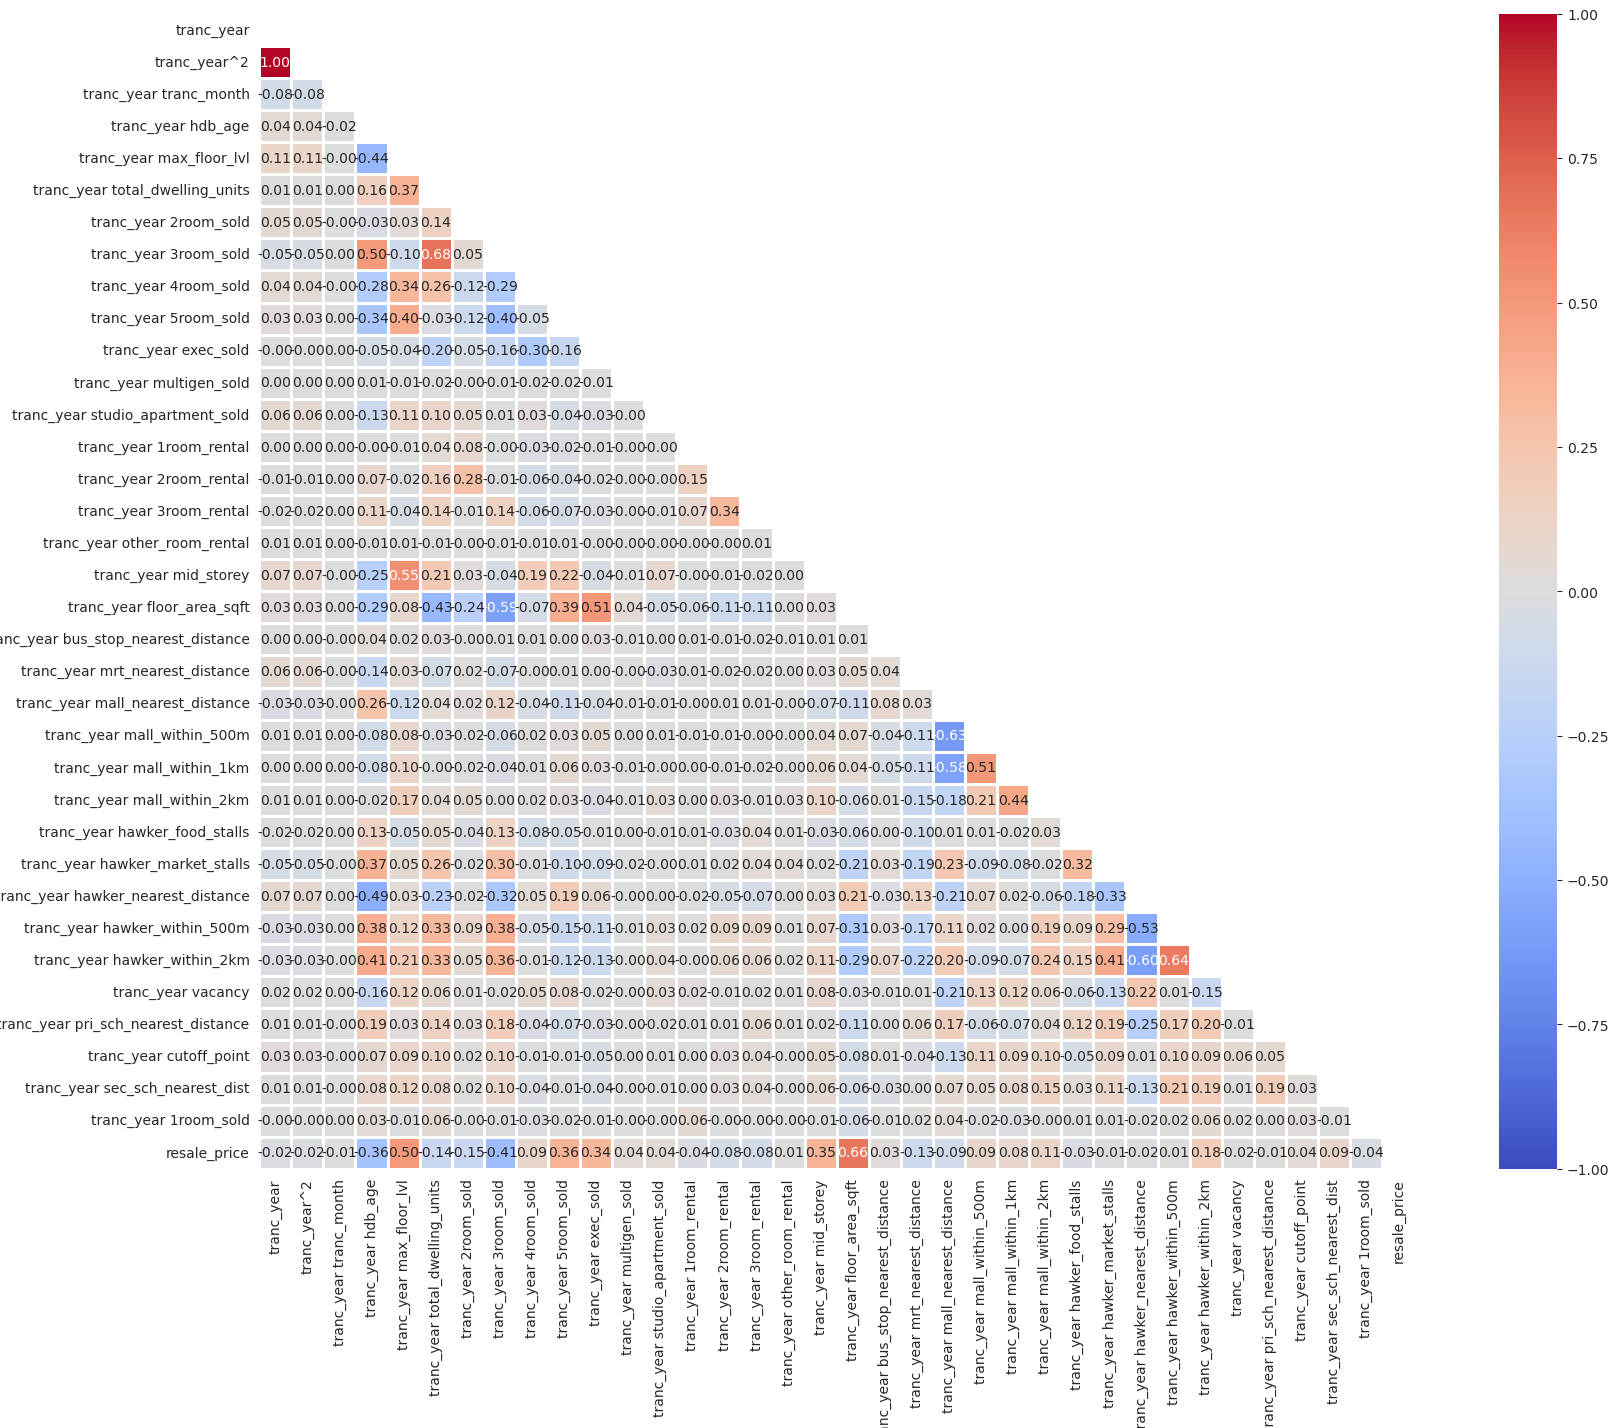

In [20]:
# heatmap of correlation between price and district
plt.figure(figsize = (22,15))

corr = filtered_data.corr(numeric_only=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = 2, cmap='coolwarm', fmt='.2f')

### 05.01. Evaluation
- The examination of the polynomial feature derived from 'tranc_year' indicates a notably low correlation with our target variable, 'resale_price.' While certain interactive terms exhibit a robust correlation with the target variable, a closer look reveals that this correlation is predominantly influenced by the partner interactive features. In our earlier analysis (Part 1), each of these partner features individually demonstrated a high linear correlation with the target variable.
- Considering this nuanced interpretation, the evidence indicates that treating 'tranc_year' as a continuous feature might not significantly enhance the predictive capabilities of our model.
- There is a compelling case to consider 'tranc_year' as a categorical variable.

In [21]:
# To drop tranc_year features from poly features
poly_features_analysis.drop(columns=[col for col in poly_features_analysis.columns if col in selected_columns], inplace=True)

In [22]:
# to assign 'tranc_year'to categorical features
other_categorical_data = train[categorical_columns].copy()
other_categorical_data['tranc_year'] = train['tranc_year']

In [23]:
# check shape of poly_features_analysis
poly_features_analysis.shape

(149805, 594)

### 05.02. Converting categorical data into numerical binary format suitable for regression analysis using one-hot encoding

In [24]:
# Convert 'tranc_year' to string type
other_categorical_data['tranc_year'] = other_categorical_data['tranc_year'].astype(str)

# to assign 'tranc_month'to categorical features
other_categorical_data['tranc_month'] = train['tranc_month']

# Convert 'tranc_month' to string type
other_categorical_data['tranc_month'] = other_categorical_data['tranc_month'].astype(str)


In [25]:
# Convert categorical data to dummy variables using one-hot encoding
other_categorical_data_dummied = pd.get_dummies(other_categorical_data, drop_first=True)

# Check data after one-hot encoding
other_categorical_data_dummied.tail()

,tranc_yearmonth_2012-04,tranc_yearmonth_2012-05,tranc_yearmonth_2012-06,tranc_yearmonth_2012-07,tranc_yearmonth_2012-08,tranc_yearmonth_2012-09,tranc_yearmonth_2012-10,tranc_yearmonth_2012-11,tranc_yearmonth_2012-12,tranc_yearmonth_2013-01,tranc_yearmonth_2013-02,tranc_yearmonth_2013-03,tranc_yearmonth_2013-04,tranc_yearmonth_2013-05,tranc_yearmonth_2013-06,tranc_yearmonth_2013-07,tranc_yearmonth_2013-08,tranc_yearmonth_2013-09,tranc_yearmonth_2013-10,tranc_yearmonth_2013-11,tranc_yearmonth_2013-12,tranc_yearmonth_2014-01,tranc_yearmonth_2014-02,tranc_yearmonth_2014-03,tranc_yearmonth_2014-04,tranc_yearmonth_2014-05,tranc_yearmonth_2014-06,tranc_yearmonth_2014-07,tranc_yearmonth_2014-08,tranc_yearmonth_2014-09,tranc_yearmonth_2014-10,tranc_yearmonth_2014-11,tranc_yearmonth_2014-12,tranc_yearmonth_2015-01,tranc_yearmonth_2015-02,tranc_yearmonth_2015-03,tranc_yearmonth_2015-04,tranc_yearmonth_2015-05,tranc_yearmonth_2015-06,tranc_yearmonth_2015-07,tranc_yearmonth_2015-08,tranc_yearmonth_2015-09,tranc_yearmonth_2015-10,tranc_yearmonth_2015-11,tranc_yearmonth_2015-12,tranc_yearmonth_2016-01,tranc_yearmonth_2016-02,tranc_yearmonth_2016-03,tranc_yearmonth_2016-04,tranc_yearmonth_2016-05,tranc_yearmonth_2016-06,tranc_yearmonth_2016-07,tranc_yearmonth_2016-08,tranc_yearmonth_2016-09,tranc_yearmonth_2016-10,tranc_yearmonth_2016-11,tranc_yearmonth_2016-12,tranc_yearmonth_2017-01,tranc_yearmonth_2017-02,tranc_yearmonth_2017-03,tranc_yearmonth_2017-04,tranc_yearmonth_2017-05,tranc_yearmonth_2017-06,tranc_yearmonth_2017-07,tranc_yearmonth_2017-08,tranc_yearmonth_2017-09,tranc_yearmonth_2017-10,tranc_yearmonth_2017-11,tranc_yearmonth_2017-12,tranc_yearmonth_2018-01,tranc_yearmonth_2018-02,tranc_yearmonth_2018-03,tranc_yearmonth_2018-04,tranc_yearmonth_2018-05,tranc_yearmonth_2018-06,tranc_yearmonth_2018-07,tranc_yearmonth_2018-08,tranc_yearmonth_2018-09,tranc_yearmonth_2018-10,tranc_yearmonth_2018-11,tranc_yearmonth_2018-12,tranc_yearmonth_2019-01,tranc_yearmonth_2019-02,tranc_yearmonth_2019-03,tranc_yearmonth_2019-04,tranc_yearmonth_2019-05,tranc_yearmonth_2019-06,tranc_yearmonth_2019-07,tranc_yearmonth_2019-08,tranc_yearmonth_2019-09,tranc_yearmonth_2019-10,tranc_yearmonth_2019-11,tranc_yearmonth_2019-12,tranc_yearmonth_2020-01,tranc_yearmonth_2020-02,tranc_yearmonth_2020-03,tranc_yearmonth_2020-04,tranc_yearmonth_2020-05,tranc_yearmonth_2020-06,tranc_yearmonth_2020-07,tranc_yearmonth_2020-08,tranc_yearmonth_2020-09,tranc_yearmonth_2020-10,tranc_yearmonth_2020-11,tranc_yearmonth_2020-12,tranc_yearmonth_2021-01,tranc_yearmonth_2021-02,tranc_yearmonth_2021-03,tranc_yearmonth_2021-04,planning_area_Bedok,planning_area_Bishan,planning_area_Bukit Batok,planning_area_Bukit Merah,planning_area_Bukit Panjang,planning_area_Bukit Timah,planning_area_Changi,planning_area_Choa Chu Kang,planning_area_Clementi,planning_area_Downtown Core,planning_area_Geylang,planning_area_Hougang,planning_area_Jurong East,planning_area_Jurong West,planning_area_Kallang,planning_area_Marine Parade,planning_area_Novena,planning_area_Outram,planning_area_Pasir Ris,planning_area_Punggol,planning_area_Queenstown,planning_area_Rochor,planning_area_Sembawang,planning_area_Sengkang,planning_area_Serangoon,planning_area_Tampines,planning_area_Tanglin,planning_area_Toa Payoh,planning_area_Western Water Catchment,planning_area_Woodlands,planning_area_Yishun,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,full_flat_type_2 ROOM 2-room,full_flat_type_2 ROOM DBSS,full_flat_ty

### 06.01. Exporting Data for Model 1 - Non-Polynomial Features
- Model 1, which exclusively employs non-polynomial features as predictor variables. This dataset provides a baseline for comparison, allowing us to assess the impact of polynomial features on the model's performance.

In [26]:
# Drop 'tranc_year' from a copy of numerical_data
numerical_data_copy = numerical_data.copy()
numerical_data_copy.drop(columns=['tranc_year', 'tranc_month'], inplace=True)

In [27]:
# Concatenate different types of features and target variable for Model 1
model_1 = pd.concat([
    numerical_data_copy,
    binary_categorical_data,
    other_categorical_data_dummied,
    train['resale_price']
], axis=1)

# Check Model_1
model_1.tail()

,hdb_age,max_floor_lvl,total_dwelling_units,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,mid_storey,floor_area_sqft,bus_stop_nearest_distance,mrt_nearest_distance,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_food_stalls,hawker_market_stalls,hawker_nearest_distance,hawker_within_500m,hawker_within_2km,vacancy,pri_sch_nearest_distance,cutoff_point,sec_sch_nearest_dist,1room_sold,commercial,market_hawker,multistorey_carpark,precinct_pavilion,bus_interchange,mrt_interchange,pri_sch_affiliation,affiliation,tranc_yearmonth_2012-04,tranc_yearmonth_2012-05,tranc_yearmonth_2012-06,tranc_yearmonth_2012-07,tranc_yearmonth_2012-08,tranc_yearmonth_2012-09,tranc_yearmonth_2012-10,tranc_yearmonth_2012-11,tranc_yearmonth_2012-12,tranc_yearmonth_2013-01,tranc_yearmonth_2013-02,tranc_yearmonth_2013-03,tranc_yearmonth_2013-04,tranc_yearmonth_2013-05,tranc_yearmonth_2013-06,tranc_yearmonth_2013-07,tranc_yearmonth_2013-08,tranc_yearmonth_2013-09,tranc_yearmonth_2013-10,tranc_yearmonth_2013-11,tranc_yearmonth_2013-12,tranc_yearmonth_2014-01,tranc_yearmonth_2014-02,tranc_yearmonth_2014-03,tranc_yearmonth_2014-04,tranc_yearmonth_2014-05,tranc_yearmonth_2014-06,tranc_yearmonth_2014-07,tranc_yearmonth_2014-08,tranc_yearmonth_2014-09,tranc_yearmonth_2014-10,tranc_yearmonth_2014-11,tranc_yearmonth_2014-12,tranc_yearmonth_2015-01,tranc_yearmonth_2015-02,tranc_yearmonth_2015-03,tranc_yearmonth_2015-04,tranc_yearmonth_2015-05,tranc_yearmonth_2015-06,tranc_yearmonth_2015-07,tranc_yearmonth_2015-08,tranc_yearmonth_2015-09,tranc_yearmonth_2015-10,tranc_yearmonth_2015-11,tranc_yearmonth_2015-12,tranc_yearmonth_2016-01,tranc_yearmonth_2016-02,tranc_yearmonth_2016-03,tranc_yearmonth_2016-04,tranc_yearmonth_2016-05,tranc_yearmonth_2016-06,tranc_yearmonth_2016-07,tranc_yearmonth_2016-08,tranc_yearmonth_2016-09,tranc_yearmonth_2016-10,tranc_yearmonth_2016-11,tranc_yearmonth_2016-12,tranc_yearmonth_2017-01,tranc_yearmonth_2017-02,tranc_yearmonth_2017-03,tranc_yearmonth_2017-04,tranc_yearmonth_2017-05,tranc_yearmonth_2017-06,tranc_yearmonth_2017-07,tranc_yearmonth_2017-08,tranc_yearmonth_2017-09,tranc_yearmonth_2017-10,tranc_yearmonth_2017-11,tranc_yearmonth_2017-12,tranc_yearmonth_2018-01,tranc_yearmonth_2018-02,tranc_yearmonth_2018-03,tranc_yearmonth_2018-04,tranc_yearmonth_2018-05,tranc_yearmonth_2018-06,tranc_yearmonth_2018-07,tranc_yearmonth_2018-08,tranc_yearmonth_2018-09,tranc_yearmonth_2018-10,tranc_yearmonth_2018-11,tranc_yearmonth_2018-12,tranc_yearmonth_2019-01,tranc_yearmonth_2019-02,tranc_yearmonth_2019-03,tranc_yearmonth_2019-04,tranc_yearmonth_2019-05,tranc_yearmonth_2019-06,tranc_yearmonth_2019-07,tranc_yearmonth_2019-08,tranc_yearmonth_2019-09,tranc_yearmonth_2019-10,tranc_yearmonth_2019-11,tranc_yearmonth_2019-12,tranc_yearmonth_2020-01,tranc_yearmonth_2020-02,tranc_yearmonth_2020-03,tranc_yearmonth_2020-04,tranc_yearmonth_2020-05,tranc_yearmonth_2020-06,tranc_yearmonth_2020-07,tranc_yearmonth_2020-08,tranc_yearmonth_2020-09,tranc_yearmonth_2020-10,tranc_yearmonth_2020-11,tranc_yearmonth_2020-12,tranc_yearmonth_2021-01,tranc_yearmonth_2021-02,tranc_yearmonth_2021-03,tranc_yearmonth_2021-04,planning_area_Bedok,planning_area_Bishan,planning_area_Bukit Batok,planning_area_Bukit Merah,planning_area_Bukit Panjang,planning_area_Bukit Timah,planning_area_Changi,planning_area_Choa Chu Kang,planning_area_Clementi,planning_area_Downtown Core,planning_area_Geylang,planning_area_Hougang,planning_area_Jurong East,planning_area_Jurong West,planning_area_Kallang,planning_area_Marine Parade,planning_area_Novena,planning_area_Outram,planning_area_Pasir Ris,planning_area_Punggol,planning_area_Queenstown,planning_area_Rochor,planning_area_Sembawang,planning_area_Sengkang,planning_area_Serangoon,planning_area_Tampines,planning_area_Tanglin,planning_area_Toa Payoh,planning_area_Western Water Catchment,planning_area_Woodlands,planning_area

In [28]:
# Export Model_1
import os  # to work with files/directories

# Define the output folder path
output_folder_path = '../project_2/output'

# Check if the output folder exists, and create it if not
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Save Model_1 CSV file within the 'output' folder
model_1.to_csv(os.path.join(output_folder_path, 'model_1.csv'))

### 06.02. Polynomial Features on updated numerical_data

In [29]:
# Creating polynomial features up to the second degree with interactions for numerical data
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transforming the numerical data with polynomial features
numerical_data_poly = poly.fit_transform(numerical_data_copy)

## Creating a DataFrame for the polynomial features
poly_features_analysis = pd.DataFrame(numerical_data_poly, columns=poly.get_feature_names_out(numerical_data_copy.columns))
poly_features_analysis.head()

,hdb_age,max_floor_lvl,total_dwelling_units,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,mid_storey,floor_area_sqft,bus_stop_nearest_distance,mrt_nearest_distance,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_food_stalls,hawker_market_stalls,hawker_nearest_distance,hawker_within_500m,hawker_within_2km,vacancy,pri_sch_nearest_distance,cutoff_point,sec_sch_nearest_dist,1room_sold,hdb_age^2,hdb_age max_floor_lvl,hdb_age total_dwelling_units,hdb_age 2room_sold,hdb_age 3room_sold,hdb_age 4room_sold,hdb_age 5room_sold,hdb_age exec_sold,hdb_age multigen_sold,hdb_age studio_apartment_sold,hdb_age 1room_rental,hdb_age 2room_rental,hdb_age 3room_rental,hdb_age other_room_rental,hdb_age mid_storey,hdb_age floor_area_sqft,hdb_age bus_stop_nearest_distance,hdb_age mrt_nearest_distance,hdb_age mall_nearest_distance,hdb_age mall_within_500m,hdb_age mall_within_1km,hdb_age mall_within_2km,hdb_age hawker_food_stalls,hdb_age hawker_market_stalls,hdb_age hawker_nearest_distance,hdb_age hawker_within_500m,hdb_age hawker_within_2km,hdb_age vacancy,hdb_age pri_sch_nearest_distance,hdb_age cutoff_point,hdb_age sec_sch_nearest_dist,hdb_age 1room_sold,max_floor_lvl^2,max_floor_lvl total_dwelling_units,max_floor_lvl 2room_sold,max_floor_lvl 3room_sold,max_floor_lvl 4room_sold,max_floor_lvl 5room_sold,max_floor_lvl exec_sold,max_floor_lvl multigen_sold,max_floor_lvl studio_apartment_sold,max_floor_lvl 1room_rental,max_floor_lvl 2room_rental,max_floor_lvl 3room_rental,max_floor_lvl other_room_rental,max_floor_lvl mid_storey,max_floor_lvl floor_area_sqft,max_floor_lvl bus_stop_nearest_distance,max_floor_lvl mrt_nearest_distance,max_floor_lvl mall_nearest_distance,max_floor_lvl mall_within_500m,max_floor_lvl mall_within_1km,max_floor_lvl mall_within_2km,max_floor_lvl hawker_food_stalls,max_floor_lvl hawker_market_stalls,max_floor_lvl hawker_nearest_distance,max_floor_lvl hawker_within_500m,max_floor_lvl hawker_within_2km,max_floor_lvl vacancy,max_floor_lvl pri_sch_nearest_distance,max_floor_lvl cutoff_point,max_floor_lvl sec_sch_nearest_dist,max_floor_lvl 1room_sold,total_dwelling_units^2,total_dwelling_units 2room_sold,total_dwelling_units 3room_sold,total_dwelling_units 4room_sold,total_dwelling_units 5room_sold,total_dwelling_units exec_sold,total_dwelling_units multigen_sold,total_dwelling_units studio_apartment_sold,total_dwelling_units 1room_rental,total_dwelling_units 2room_rental,total_dwelling_units 3room_rental,total_dwelling_units other_room_rental,total_dwelling_units mid_storey,total_dwelling_units floor_area_sqft,total_dwelling_units bus_stop_nearest_distance,total_dwelling_units mrt_nearest_distance,total_dwelling_units mall_nearest_distance,total_dwelling_units mall_within_500m,total_dwelling_units mall_within_1km,total_dwelling_units mall_within_2km,total_dwelling_units hawker_food_stalls,total_dwelling_units hawker_market_stalls,total_dwelling_units hawker_nearest_distance,total_dwelling_units hawker_within_500m,total_dwelling_units hawker_within_2km,total_dwelling_units vacancy,total_dwelling_units pri_sch_nearest_distance,total_dwelling_units cutoff_point,total_dwelling_units sec_sch_nearest_dist,total_dwelling_units 1room_sold,2room_sold^2,2room_sold 3room_sold,2room_sold 4room_sold,2room_sold 5room_sold,2room_sold exec_sold,2room_sold multigen_sold,2room_sold studio_apartment_sold,2room_sold 1room_rental,2room_sold 2room_rental,2room_sold 3room_rental,2room_sold other_room_rental,2room_sold mid_storey,2room_sold floor_area_sqft,2room_sold bus_stop_nearest_distance,2room_sold mrt_nearest_distance,2room_sold mall_nearest_distance,2room_sold mall_within_500m,2room_sold mall_within_1km,2room_sold mall_within_2km,2room_sold hawker_food_stalls,2room_sold hawker_market_stalls,2room_sold hawker_nearest_distance,2room_sold hawker_within_500m,2room_sold hawker_within_2km,2room_sold vacancy,2room_sold pri_sch_near

### 06.03. Exporting Data for Model 2 - Polynomial Features (Unadjusted Model)
In this section, we export the dataset for Model 2, which utilizes polynomial features as predictor variables.
- Capturing Non-linear Relationships: Real-world data is often non-linear. Polynomial features can help capture these non-linear relationships by adding higher-degree terms and interaction terms to the model.
- Improving Model Performance: By accounting for non-linearities and interactions, polynomial features can often improve the performance of the model, as reflected in metrics like R-squared and RMSE.
- Interpreting Interactions: Interaction terms can help in understanding how different features can interact with each other to influence our target variable (resale price). This can provide valuable insights into the underlying processes.

In [30]:
# Concatenate different types of features and target variable for Model 2
model_2 = pd.concat([
    poly_features_analysis,
    binary_categorical_data,
    other_categorical_data_dummied,
    train['resale_price']
], axis=1)

# Check Model_1
print(model_2.shape)
print(model_2.tail())

(149805, 796)
        hdb_age  max_floor_lvl  total_dwelling_units  2room_sold  3room_sold  \
149800     25.0           12.0                  60.0         0.0         6.0   
149801     16.0           16.0                  90.0         0.0         0.0   
149802     27.0           15.0                  56.0         0.0         0.0   
149803     42.0           10.0                 209.0         0.0       200.0   
149804     31.0           12.0                  66.0         0.0         0.0   

        4room_sold  5room_sold  exec_sold  multigen_sold  \
149800         4.0        10.0       40.0            0.0   
149801        30.0        60.0        0.0            0.0   
149802         0.0         0.0       56.0            0.0   
149803         0.0         7.0        0.0            0.0   
149804         0.0         0.0        0.0           66.0   

        studio_apartment_sold  1room_rental  2room_rental  3room_rental  \
149800                    0.0           0.0           0.0           0

In [31]:
# Export Model_2
import os  # to work with files/directories

# Define the output folder path
output_folder_path = '../project_2/output'

# Check if the output folder exists, and create it if not
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Save Model_1 CSV file within the 'output' folder
model_2.to_csv(os.path.join(output_folder_path, 'model_2.csv'))

### 07.01. Evaluate Multicollinearity Among Polynomial Features
- To assess multicollinearity, we will examine the correlation between polynomial features. If the correlation coefficient between two independent variables exceeds 0.8, it is indicative of multicollinearity, and we will consider dropping one of the correlated features.

In [32]:
# Calculate the correlation matrix
correlation_matrix = poly_features_analysis.corr()

# Set a threshold for correlation coefficient
threshold = 0.8

# Create a mask to identify highly correlated features
correlation_mask = (correlation_matrix.abs() > threshold)

# Identify pairs of highly correlated features along with their correlation values
correlated_feature_pairs = []
for col in correlation_matrix.columns:
    correlated_columns = correlation_matrix.index[correlation_mask[col]]
    for correlated_col in correlated_columns:
        if col != correlated_col:  # Exclude self-correlation
            correlation_value = correlation_matrix.loc[col, correlated_col]
            correlated_feature_pairs.append((col, correlated_col, correlation_value))

# Display the correlated feature pairs with their correlation values
for pair in correlated_feature_pairs:
    print(f"Features: {pair[0]} and {pair[1]}, Correlation: {pair[2]}")

Features: hdb_age and hdb_age^2, Correlation: 0.9688643772561161
Features: hdb_age and hdb_age cutoff_point, Correlation: 0.976886671192385
Features: max_floor_lvl and max_floor_lvl^2, Correlation: 0.9590544819256115
Features: max_floor_lvl and max_floor_lvl total_dwelling_units, Correlation: 0.8031917431271796
Features: max_floor_lvl and max_floor_lvl floor_area_sqft, Correlation: 0.8668545541393194
Features: max_floor_lvl and max_floor_lvl cutoff_point, Correlation: 0.9702154309798888
Features: total_dwelling_units and total_dwelling_units^2, Correlation: 0.939830159534408
Features: total_dwelling_units and total_dwelling_units floor_area_sqft, Correlation: 0.8058039808260148
Features: total_dwelling_units and total_dwelling_units vacancy, Correlation: 0.8121394277050209
Features: total_dwelling_units and total_dwelling_units cutoff_point, Correlation: 0.9754542009499876
Features: 2room_sold and max_floor_lvl 2room_sold, Correlation: 0.9251268797691912
Features: 2room_sold and total_

In [33]:
# Add back 'resale_price' column
poly_features_analysis['resale_price'] = train['resale_price']

# Iterate through correlated feature pairs and drop the one with lower correlation to the target variable
for pair in correlated_feature_pairs:
    feature1 = pair[0]
    feature2 = pair[1]

    # Check if features are present in the DataFrame
    if feature1 in poly_features_analysis.columns and feature2 in poly_features_analysis.columns:
        feature1_corr = poly_features_analysis.corr(numeric_only=True)['resale_price'].abs().loc[feature1]
        feature2_corr = poly_features_analysis.corr(numeric_only=True)['resale_price'].abs().loc[feature2]

        # Drop the feature with lower correlation to the target variable
        if feature1_corr < feature2_corr:
            poly_features_analysis.drop(columns=[feature1], inplace=True)
            print(f"Dropped feature: {feature1} in pair {pair} due to lower correlation with the target variable")
        else:
            poly_features_analysis.drop(columns=[feature2], inplace=True)
            print(f"Dropped feature: {feature2} in pair {pair} due to lower correlation with the target variable")
    else:
        print(f"Features {feature1} and/or {feature2} not found in DataFrame")

# Display the shape of the modified DataFrame
print(f"Shape of the DataFrame after dropping features in correlated pairs: {poly_features_analysis.shape}")

Dropped feature: hdb_age in pair ('hdb_age', 'hdb_age^2', 0.9688643772561161) due to lower correlation with the target variable
Features hdb_age and/or hdb_age cutoff_point not found in DataFrame
Dropped feature: max_floor_lvl in pair ('max_floor_lvl', 'max_floor_lvl^2', 0.9590544819256115) due to lower correlation with the target variable
Features max_floor_lvl and/or max_floor_lvl total_dwelling_units not found in DataFrame
Features max_floor_lvl and/or max_floor_lvl floor_area_sqft not found in DataFrame
Features max_floor_lvl and/or max_floor_lvl cutoff_point not found in DataFrame
Dropped feature: total_dwelling_units^2 in pair ('total_dwelling_units', 'total_dwelling_units^2', 0.939830159534408) due to lower correlation with the target variable
Dropped feature: total_dwelling_units in pair ('total_dwelling_units', 'total_dwelling_units floor_area_sqft', 0.8058039808260148) due to lower correlation with the target variable
Features total_dwelling_units and/or total_dwelling_units 

In [34]:
# Inspect if there are any remaining multicolinearity indicators among features after the previous removals
# Calculate the correlation matrix for the remaining features
remaining_corr_matrix = poly_features_analysis.drop(columns=['resale_price']).corr()

# Set a threshold for correlation coefficient
threshold = 0.8

# Create a mask to identify highly correlated features
remaining_correlation_mask = (remaining_corr_matrix.abs() > threshold)

# Identify pairs of highly correlated features for the remaining features
remaining_correlated_feature_pairs = []
for col in remaining_corr_matrix.columns:
    remaining_correlated_columns = remaining_corr_matrix.index[remaining_correlation_mask[col]]
    for remaining_correlated_col in remaining_correlated_columns:
        if col != remaining_correlated_col:  # Exclude self-correlation
            correlation_value = remaining_corr_matrix.loc[col, remaining_correlated_col]
            remaining_correlated_feature_pairs.append((col, remaining_correlated_col, correlation_value))

# Display the remaining correlated feature pairs with their correlation values
for pair in remaining_correlated_feature_pairs:
    print(f"Remaining Features: {pair[0]} and {pair[1]}, Correlation: {pair[2]}")

### 07.02. Exporting Data for Model 3 - Polynomial Features (Adjusted for Multicollinearity)

In [35]:
# Concatenate different types of features for Model 3
model_3 = pd.concat([
    poly_features_analysis,
    binary_categorical_data,
    other_categorical_data_dummied
    ], axis=1)

# Check Model_1
print(model_3.shape)
print(model_3.tail())

(149805, 503)
        2room_sold  3room_sold  floor_area_sqft  hawker_food_stalls  vacancy  \
149800         0.0         6.0         1733.004                43.0     43.0   
149801         0.0         0.0         1184.040                72.0     45.0   
149802         0.0         0.0         1550.016                36.0     43.0   
149803         0.0       200.0          635.076                39.0     82.0   
149804         0.0         0.0         1765.296                45.0     53.0   

        hdb_age^2  hdb_age max_floor_lvl  hdb_age 2room_sold  \
149800      625.0                  300.0                 0.0   
149801      256.0                  256.0                 0.0   
149802      729.0                  405.0                 0.0   
149803     1764.0                  420.0                 0.0   
149804      961.0                  372.0                 0.0   

        hdb_age 4room_sold  hdb_age 1room_rental  hdb_age mid_storey  \
149800               100.0                   0.0

In [36]:
# Export Model_3
import os  # to work with files/directories

# Define the output folder path
output_folder_path = '../project_2/output'

# Check if the output folder exists, and create it if not
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Save Model_3 CSV file within the 'output' folder
model_3.to_csv(os.path.join(output_folder_path, 'model_3.csv'))

### 08.01. Assess Correlation Between Polynomial Features and Target Variable
- Following the identification and potential removal of features with multicollinearity, we will further evaluate the remaining polynomial features. Specifically, we will analyze the correlation between each polynomial feature and the target variable. Features exhibiting a correlation of less than 0.1 with the target variable will be considered for removal from our model
- These steps aim to refine our feature selection process, ensuring that our model is not only free from multicollinearity issues but also includes polynomial features that contribute meaningfully to the prediction of the target variable.

In [37]:
# determine corr sorted by abs values
correlation_result = poly_features_analysis.corr(numeric_only=True)['resale_price'].abs().sort_values(ascending=False)

# Display all rows:
pd.set_option('display.max_rows', None)

# Display the entire Series
correlation_result

resale_price                                          1.000000
max_floor_lvl floor_area_sqft                         0.729421
floor_area_sqft                                       0.656776
mid_storey floor_area_sqft                            0.536956
5room_sold hawker_within_2km                          0.506507
max_floor_lvl 5room_sold                              0.457808
max_floor_lvl hawker_within_2km                       0.417386
3room_sold                                            0.411948
5room_sold hawker_within_500m                         0.395012
floor_area_sqft vacancy                               0.376370
5room_sold hawker_market_stalls                       0.369595
floor_area_sqft mall_within_2km                       0.369333
5room_sold sec_sch_nearest_dist                       0.368153
hdb_age^2                                             0.367499
exec_sold floor_area_sqft                             0.354567
max_floor_lvl sec_sch_nearest_dist                    0

In [38]:
# Extract only the polynomial features (excluding the target variable)
poly_features_only = poly_features_analysis.drop(columns=['resale_price'])

# target_variable
target_variable = poly_features_analysis['resale_price']

# Calculate the correlation between each polynomial feature and the target variable
correlation_with_target = poly_features_only.corrwith(target_variable)

# Set a threshold for correlation with the target variable
threshold_target = 0.1

# Identify features with correlation less than the threshold or NaN values
low_correlation_features = correlation_with_target[correlation_with_target.abs() < threshold_target]
nan_features = correlation_with_target[correlation_with_target.isna()]

# Combine both conditions to identify features to drop
features_to_drop = set(low_correlation_features.index) | set(nan_features.index)

# Select features with high correlation with the target variable and without NaN values
selected_poly_features = poly_features_analysis.drop(columns=features_to_drop)

# Print the dropped features
print(f"Dropped features with low correlation or NaN values with the target variable: {features_to_drop}")

# Print the shape of the new DataFrame
print(f"Shape of the selected polynomial features DataFrame with respect to the target variable: {selected_poly_features.shape}")

Dropped features with low correlation or NaN values with the target variable: {'1room_rental other_room_rental', 'mrt_nearest_distance mall_within_1km', 'multigen_sold 2room_rental', 'studio_apartment_sold hawker_market_stalls', 'mall_within_500m^2', '2room_sold exec_sold', 'mall_within_1km hawker_within_500m', 'total_dwelling_units pri_sch_nearest_distance', 'hawker_nearest_distance sec_sch_nearest_dist', 'mrt_nearest_distance hawker_within_2km', '5room_sold 3room_rental', '5room_sold 1room_sold', 'exec_sold 3room_rental', 'exec_sold studio_apartment_sold', 'multigen_sold 3room_rental', '2room_sold 1room_sold', 'bus_stop_nearest_distance hawker_nearest_distance', '2room_rental 1room_sold', 'mall_within_1km hawker_food_stalls', '2room_sold 3room_rental', 'total_dwelling_units mall_within_2km', '4room_sold studio_apartment_sold', 'mall_nearest_distance mall_within_1km', '2room_rental other_room_rental', 'mall_within_1km 1room_sold', '4room_sold 2room_rental', 'hdb_age 1room_sold', 'mall

### 08.02. Exporting Data for Model 4 - Polynomial Features (Adjusted for Multicollinearity and polynomial features that do not contribute meaningfully to the prediction of the target variable)

In [39]:
# Concatenate different types of features for Model 4
model_4 = pd.concat([
    selected_poly_features,
    binary_categorical_data,
    other_categorical_data_dummied
    ], axis=1)

# Check Model_1
print(model_4.shape)
print(model_4.tail())

(149805, 339)
        2room_sold  3room_sold  floor_area_sqft  hdb_age^2  \
149800         0.0         6.0         1733.004      625.0   
149801         0.0         0.0         1184.040      256.0   
149802         0.0         0.0         1550.016      729.0   
149803         0.0       200.0          635.076     1764.0   
149804         0.0         0.0         1765.296      961.0   

        hdb_age 2room_sold  hdb_age 4room_sold  \
149800                 0.0               100.0   
149801                 0.0               480.0   
149802                 0.0                 0.0   
149803                 0.0                 0.0   
149804                 0.0                 0.0   

        hdb_age bus_stop_nearest_distance  hdb_age mrt_nearest_distance  \
149800                        3439.158803                  17841.896289   
149801                         894.396204                   3836.376501   
149802                        3871.492825                  18070.673813   
149803      

In [40]:
# Export Model_4
import os  # to work with files/directories

# Define the output folder path
output_folder_path = '../project_2/output'

# Check if the output folder exists, and create it if not
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Save Model_4 CSV file within the 'output' folder
model_4.to_csv(os.path.join(output_folder_path, 'model_4.csv'))